In [438]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'large',
          'figure.figsize': (12, 8),
          'figure.titlesize': 'x-large',
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large',
          'lines.markersize': 12
          }
pylab.rcParams.update(params)

In [265]:
import pandas as pd
import numpy as np

df_column = pd.read_excel('data/dataset.xlsx').columns[1:]
column_list = []
for i in df_column:
    column_list.append(i)

df = pd.read_excel('data/dataset.xlsx',index_col=0)
df

,I,II,III,IV,V,VI
Приклади,,,,,,
1,"0.05,0.91","0.49,0.89","0.62,0.83","0.55,0.4","0.31,0.43","0.05,0.15"
2,"0.14,0.96","0.34,0.81","0.79,0.92","0.66,0.32","0.45,0.27","0.09,0.39"
3,"0.16,0.9","0.36,0.67","0.71,0.92","0.74,0.49","0.33,0.16","0.13,0.51"
4,"0.07,0.7","0.47,0.49","0.78,0.83","0.89,0.3","0.56,0.29","0.25,0.34"
5,"0.2,0.63","0.52,0.53","0.87,0.92","0.77,0.2","0.54,0.13","0.15,0.36"


In [266]:
for col in column_list:
    df[col]=[(list(map(float,vec.split(',')))) for vec in df[col]]
    df[col] = df[col].apply(lambda x: np.array(x))
df

,I,II,III,IV,V,VI
Приклади,,,,,,
1,"[0.05, 0.91]","[0.49, 0.89]","[0.62, 0.83]","[0.55, 0.4]","[0.31, 0.43]","[0.05, 0.15]"
2,"[0.14, 0.96]","[0.34, 0.81]","[0.79, 0.92]","[0.66, 0.32]","[0.45, 0.27]","[0.09, 0.39]"
3,"[0.16, 0.9]","[0.36, 0.67]","[0.71, 0.92]","[0.74, 0.49]","[0.33, 0.16]","[0.13, 0.51]"
4,"[0.07, 0.7]","[0.47, 0.49]","[0.78, 0.83]","[0.89, 0.3]","[0.56, 0.29]","[0.25, 0.34]"
5,"[0.2, 0.63]","[0.52, 0.53]","[0.87, 0.92]","[0.77, 0.2]","[0.54, 0.13]","[0.15, 0.36]"


df['I'] = df['I'].apply(lambda x: np.array(x))
arr = df['I']
for cls in column_list:
    x = [vec[0] for vec in df[cls]]
    y = [vec[1] for vec in df[cls]]
    print(x, y)

[array([0.05, 0.91]) array([0.14, 0.96]) array([0.16, 0.9 ])
 array([0.07, 0.7 ]) array([0.2 , 0.63])]
cls:I	clr:r	mrk:o
cls:IV	clr:g	mrk:^
cls:VI	clr:b	mrk:s


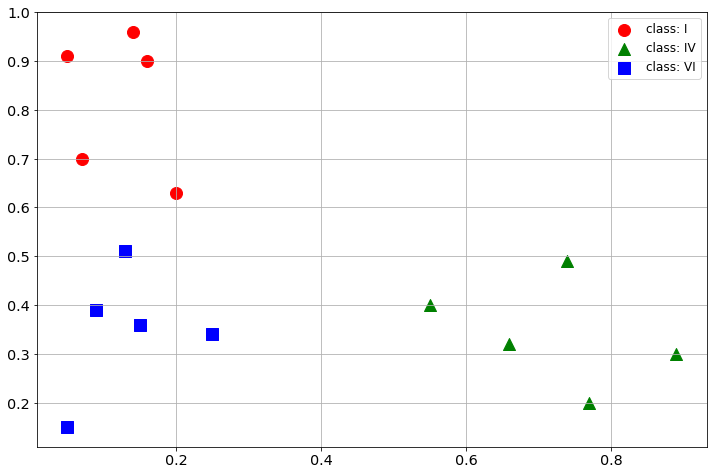

In [470]:
import matplotlib.pyplot as plt

classes = ['I','IV','VI']
sub_df = df[classes]

colors = ['r','g','b']
markers = ['o','^','s']
print(np.array(sub_df['I']))
for cls, clr, mrk in zip(classes, colors, markers):
    print(f'cls:{cls}\tclr:{clr}\tmrk:{mrk}',)

fig, ax=plt.subplots()
for cls, clr, mrk in zip(classes, colors, markers):
    x = [vec[0] for vec in df[cls]]
    y = [vec[1] for vec in df[cls]]
    ax.scatter(x,y,c=clr,marker=mrk,label=f'class: {cls}')
ax.grid('on')
ax.legend()

In [469]:
from scipy.spatial.distance import cdist

x = float(input('Enter an x: '))
y = float(input('Enter an y: '))
v = np.array([[x,y]])

classes = ['I','IV','VI']
dist_df = pd.DataFrame(columns=classes)

for col in classes:
    x_vec = [vec[0] for vec in df[col]]
    y_vec = [vec[1] for vec in df[col]]

    D = []
    for x, y in zip(x_vec, y_vec):
        D.append([x,y])
    D = np.array(D)
    distances = cdist(D,v,metric='cosine')
    dist_lst = [dist[0] for dist in distances]
    dist_df[col] = dist_lst

dist_df = dist_df.set_index(df.index)
print(f'Матриця відстаней від об`єкта {v[0]} '
      f'до прикладів класів {classes}')
dist_df

Матриця відстаней від об`єкта [0.35 0.4 ] до прикладів класів ['I', 'IV', 'VI']


,I,IV,VI
Приклади,,,
1,0.212430,0.024799,0.077806
2,0.160274,0.079139,0.118625
3,0.143781,0.035457,0.108089
4,0.185635,0.135604,0.003594
5,0.083451,0.173448,0.052043


Пара відповідний клас та мінімальна відстань ['VI', 0.0035939825162943917]


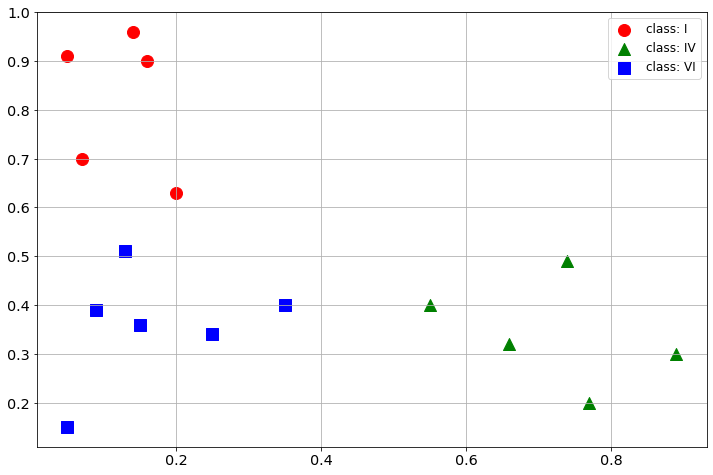

In [471]:
min_dist = [dist_df.min().idxmin(),dist_df.min().min()]
print(f'Пара відповідний клас та мінімальна відстань {min_dist}')
min_class = min_dist[0]

classes = ['I','IV','VI']
colors = ['r','g','b']
markers = ['o','^','s']

cl_obj = v[0]

triplets = zip(classes,colors,markers)

new_obj_params = list(filter(lambda x:min_class in x, triplets))


for cls, clr, mrk in new_obj_params:
    ax.scatter(cl_obj[0],cl_obj[1],c=clr,marker=mrk,label=f'class: {cls}')
fig

In [480]:
from scipy.spatial.distance import pdist

for col in classes:
    x_vec = [vec[0] for vec in df[col]]
    y_vec = [vec[1] for vec in df[col]]

    D = []
    for x, y in zip(x_vec, y_vec):
        D.append([x,y])
    D = np.array(D)
    distances = cdist(D,v,metric='cityblock')
    dist_lst = [dist[0] for dist in distances]
    print(dist_lst)


[0.81, 0.7699999999999999, 0.69, 0.5799999999999998, 0.37999999999999995]
[0.20000000000000007, 0.39000000000000007, 0.48, 0.6400000000000001, 0.6200000000000001]
[0.55, 0.27, 0.32999999999999996, 0.15999999999999998, 0.24000000000000002]
